![](https://i.imgur.com/0AUxkXt.png)

# Vương Tuấn Khanh
## Data Science 2-4



**Import libraries**

In [0]:
# Import thư viện Pandas
import pandas as pd
# Import thư viện matplotlib
import matplotlib.pyplot as plt
# Import thư viện Seaborn
import seaborn as sns

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
# Đọc dữ liệu bằng Colab Online
sal = pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv')
# Đọc dữ liệu từ file CSV sử dụng thư viện Pandas
# sal = pd.read_csv('./Salaries.csv')

**Check the head of the DataFrame.**

In [3]:
# In ra n dòng dầu tiên của DataFrame dùng hàm head(n)
sal.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
# Xem thông tin của dataframe vừa đọc vào bằng cách sử dụng hàm .info()
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [5]:
# Arithmetic mean - tổng đại số của tất cả các số trong data, chia cho số điểm dữ liệu (data point)
# Trung bình Lương:
print('mean:', sal['BasePay'].mean(axis = 0))

mean: 66325.44884050643


**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [6]:
# Mức lương nhỏ nhất:
print('min:', sal['BasePay'].min())

min: -166.01


In [7]:
# Mức lương lớn nhất:
print('max:',sal['BasePay'].max())

max: 319275.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [8]:
# Giá trị trung bình
print('mean:',sal['OvertimePay'].mean(axis = 0))
# Giá trị nhỏ nhất
print('min:',sal['OvertimePay'].min())
# Giá trị lớn nhất
print('max:',sal['OvertimePay'].max())

mean: 5066.059886444622
min: -0.01
max: 245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [9]:
# Lấy ra cột EmployeeName sau đó so sánh với tên JOSEPH DRISCOLL để tạo một DataFrame mới
# Lấy ra cột ['JobTitle'] của DataFrame này
sal[sal['EmployeeName'].str.contains('JOSEPH DRISCOLL')]['JobTitle'].head()

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [10]:
# Tạo một biến DataFrame tên temp
# So sánh EmployeeName với tên GARY JIMENEZ để tạo một DataFrame mới và lưu vào temp
# In ra toàn bộ thông tin của DataFrame temp
temp = sal[sal['EmployeeName'].str.contains('GARY JIMENEZ')]
# Ở đây không dùng hàm Print() vì sẽ bị ẩn đi thông tin
temp.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [11]:
# Lấy ra cột EmployeeName sau đó so sánh với tên JOSEPH DRISCOLL để tạo một DataFrame mới
# Lấy ra cột ['TotalPayBenefits'] của DataFrame này
sal[sal['EmployeeName'].str.contains('JOSEPH DRISCOLL')]['TotalPayBenefits'].head()

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [13]:
# Mức lương lớn nhất tính cả Benefits:
# Tạo DataFrame mới bằng cách lấy cột ['TotalPayBenefits'] so sánh với giá trị lớn nhất của cột này
# Lấy ra thông tin ['EmployeeName'] của DataFrame vừa nhận được
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [14]:
# Mức lương nhỏ nhất tính cả Benefits:
# Tạo DataFrame mới bằng cách lấy cột ['TotalPayBenefits'] so sánh với giá trị nhỏ nhất của cột này
# Lấy ra thông tin ['EmployeeName'] của DataFrame vừa nhận được
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]['EmployeeName']
# Điều đặc biệt là lương của người này âm (-618.3), điều này có nghĩa là người này đang nợ công ty

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [15]:
# Tạo DataFrame gồm các Object có Year == 2011
# Tính mean trên DataFrame này
year2011 = sal[sal['Year'] == 2011]
print('Mean 2011:', year2011['BasePay'].mean(axis = 0))

# Tạo DataFrame gồm các Object có Year == 2012
# Tính mean trên DataFrame này
year2012 = sal[sal['Year'] == 2012]
print('Mean 2012:', year2012['BasePay'].mean(axis = 0))

# Tạo DataFrame gồm các Object có Year == 2013
# Tính mean trên DataFrame này
year2013 = sal[sal['Year'] == 2013]
print('Mean 2013:', year2013['BasePay'].mean(axis = 0))

# Tạo DataFrame gồm các Object có Year == 2014
# Tính mean trên DataFrame này
year2014 = sal[sal['Year'] == 2014]
print('Mean 2014:', year2014['BasePay'].mean(axis = 0))

Mean 2011: 63595.956516774524
Mean 2012: 65436.40685742255
Mean 2013: 69630.0302164812
Mean 2014: 66564.42192449933


**How many unique job titles are there?**

Keyword: _unique, nunique_

In [16]:
# Dùng hàm unique trong Pandas trả về một Array
# Lưu Array này vào biến "array"
# Dùng hàm len() để tính số lượng Job Title trong array này
array = pd.unique(sal['JobTitle'])
print("Số lượng Unique Job Title là:", len(array))

Số lượng Unique Job Title là: 2159


**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [17]:
# Tạo thêm một cột count đếm số lượng JobTitle dùng hàm lambda
# Dùng kết hợp hàm value_counts() để sắp xếp DataFrame theo thứ tự giảm dần, Head(5) để xuất 5 hàng đầu tiên
sal['count'] = sal.groupby('JobTitle', as_index=False)['JobTitle'].transform(lambda s: s.count())
sal.JobTitle.value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [27]:
# Dùng lại DataFrame year2013 gồm tất cả Object của năm 2013
# Kiểm tra bằng trường count đã được tạo thêm ở ví dụ trên và tạo 1 Dataframe mới gồm tất cả Job Title chỉ xuất hiện 1 lần
result = year2013[year2013['count'] == 1]
# Xuất ra chiều dài DataFrame
len(result)

6

**How many people have the word Chief in their job title?**

In [49]:
# Tạo Dataframe mới với JobTitle có chứa 'Chief'
salChief = sal['JobTitle'].str.contains('Chief')
salChief.sum()

423

## Data Visualization

**Implement seaborn's countplot with x='Year'**

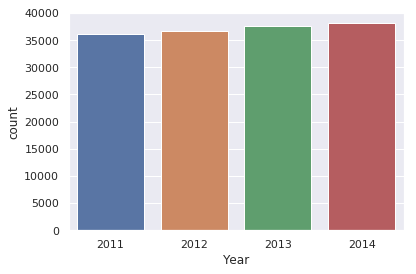

In [42]:
# Chọn style
sns.set(style='darkgrid')
# Gọi hàm countplot với x = 'Year' và dữ liệu đầu vào là dataset sal
sns.countplot(x = 'Year',
              data = sal)
# Xuất bảng
plt.show()

**Implement seaborn's distplot for BasePay of Year 2011**

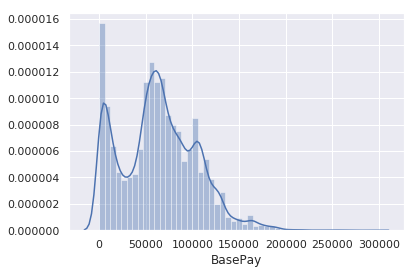

In [40]:
# Tạo seaborn distplot dùng Dataset year2011 gồm các Object của năm 2011 và lấy cột 'BasePay'
sns.distplot(year2011['BasePay'])
# Xuất bảng
plt.show()

**How about other Year**

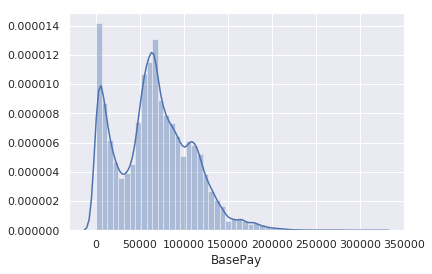

In [48]:
# Tạo bảng mới với thông tin của các đối tượng khác năm 2014
except2014 = sal[sal['Year'] != 2014]
# Xóa bỏ các dòng có giá trị NaN ở cột 'BasePay' bằng lệnh dropna()
except2014 = except2014.dropna(subset=['BasePay'])
# Tạo seaborn distplot dùng Dataset year2014 gồm các Object của các năm khác 2014 và lấy cột 'BasePay'
sns.distplot(except2014['BasePay'])
# Xuất bảng
plt.show()

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [78]:
# Sắp xếp DataFrame giảm dần theo cột BasePay
Base = sal.groupby('JobTitle').mean()
Base = Base.sort_values('BasePay', ascending=False)
# Xuất bảng top 5
Base.head(5)['BasePay']

JobTitle
Chief of Police                           309767.666667
Chief, Fire Department                    304232.333333
Gen Mgr, Public Trnsp Dept                297769.000000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000000
Dep Dir for Investments, Ret              276153.500000
Name: BasePay, dtype: float64

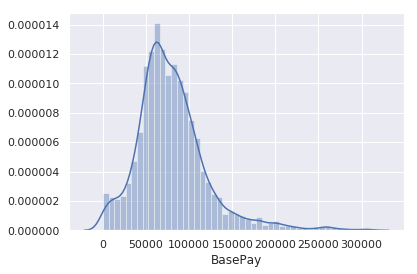

In [79]:
# Visualize
# Xóa các dòng có giá trị NaN
Base = Base.dropna(subset=['BasePay'])
# Tạo seaborn distplot
sns.distplot(Base['BasePay'])
# Xuất bảng
plt.show()

In [80]:
# Sắp xếp DataFrame giảm dần theo cột Benefits
Base_1 = sal.groupby('JobTitle').mean()
Base_1 = Base.sort_values('Benefits', ascending=False)
# Xuất bảng top 5
Base_1.head(5)['Benefits']

JobTitle
Chief Investment Officer      96570.660000
Gen Mgr, Public Trnsp Dept    82927.026667
Chief, Fire Department        82893.643333
Chief of Police               82548.620000
Mayor                         78360.376667
Name: Benefits, dtype: float64

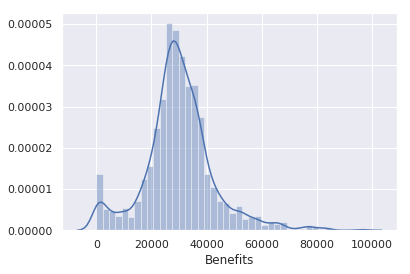

In [82]:
# Visualize
# Xóa các dòng có giá trị NaN
Base_1 = Base_1.dropna(subset=['Benefits'])
# Tạo seaborn distplot
sns.distplot(Base_1['Benefits'])
# Xuất bảng
plt.show()

In [83]:
# Sắp xếp DataFrame giảm dần theo cột OvertimePay
Base_2 = sal.groupby('JobTitle').mean()
Base_2 = Base.sort_values('OvertimePay', ascending=False)
# Xuất bảng top 5
Base_2.head(5)['OvertimePay']

JobTitle
Wire Rope Cable Maint Sprv                82446.923333
WIRE ROPE CABLE MAINTENANCE SUPERVISOR    66164.730000
Trnst Power Line Wrk Sprv 2               59259.306667
Track Maint Wrk Sprv 1                    50613.903478
Incident Support Specialist               50596.387143
Name: OvertimePay, dtype: float64

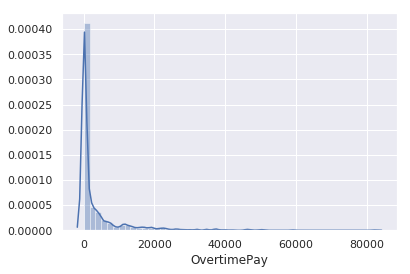

In [84]:
# Visualize
# Xóa các dòng có giá trị NaN
Base_2 = Base_2.dropna(subset=['OvertimePay'])
# Tạo seaborn distplot
sns.distplot(Base_1['OvertimePay'])
# Xuất bảng
plt.show()

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [88]:
sal.corr(method ='kendall')

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status,count
Id,1.000000,-0.201080,-0.071083,-0.104453,-0.324056,-0.225156,-0.150623,0.865969,NaN,NaN,0.152694
BasePay,-0.201080,1.000000,0.224879,0.290502,0.790305,0.887610,0.832938,0.023487,NaN,NaN,-0.095373
OvertimePay,-0.071083,0.224879,1.000000,0.440682,0.269008,0.336174,0.325602,0.013507,NaN,NaN,0.185949
OtherPay,-0.104453,0.290502,0.440682,1.000000,0.304795,0.373620,0.355090,-0.014943,NaN,NaN,0.152532
Benefits,-0.324056,0.790305,0.269008,0.304795,1.000000,0.778525,0.821922,-0.050176,NaN,NaN,-0.087416
TotalPay,-0.225156,0.887610,0.336174,0.373620,0.778525,1.000000,0.888491,0.020540,NaN,NaN,-0.058185
TotalPayBenefits,-0.150623,0.832938,0.325602,0.355090,0.821922,0.888491,1.000000,0.114866,NaN,NaN,-0.030876
Year,0.865969,0.023487,0.013507,-0.014943,-0.050176,0.020540,0.114866,1.000000,NaN,NaN,0.155678
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


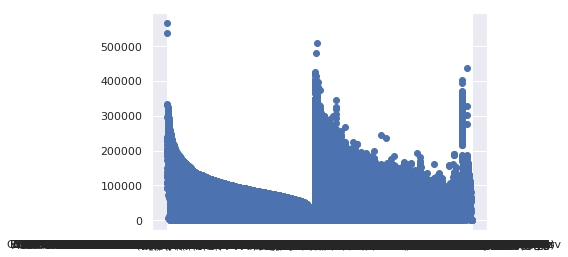

In [89]:
plt.scatter((sal['JobTitle']), sal['TotalPayBenefits'])
plt.show()

# Great Job!